In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset

In [4]:
from keras.datasets import mnist 

In [94]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Adjust the dimension

In [95]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [96]:
x_train = x_train/255
x_test = x_test/255

In [97]:
x_train[123].shape

(28, 28, 1)

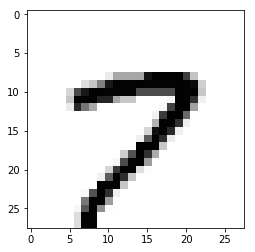

In [11]:
X = x_train[123].reshape(28,28)
plt.imshow(X, cmap='Greys');

## 1-hot encoding

In [12]:
from keras.utils import np_utils

In [98]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## Build a CNN

### Required functions

In [19]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, concatenate
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta

The structure of our artificial CNN networks.

![](image/CNN_structure.PNG)

- $W_{4\times4}$ denotes a 4 by 4 filter matrix
- $P_{2\times2}$ denotes a 2 by 2 Max pooling matrix

### Define the hidden layers

In [136]:
f1 = Conv2D(4,(4,4), padding = 'same', activation = 'selu') # Number of filters: 4
pool1 = MaxPool2D(pool_size = (2, 2))

f2 = Conv2D(8,(4,4), padding = 'same', activation = 'selu') # Number of filters: 8
pool2 = MaxPool2D(pool_size = (2, 2))

f3 = Conv2D(16,(4,4), padding = 'same', activation = 'selu') # Number of filters: 16
pool3 = MaxPool2D(pool_size = (2, 2))

f4 = Dense(50, activation='relu')  
f5 = Dense(20, activation='selu')     #   50 to 20
f6 = Dense(20, activation='linear')   #   50 to 20
f7 = Dense(10, activation='softmax')  #   40 to 10

### Define the variables

In [137]:
x = Input(shape = (28, 28, 1))
h1 = pool1(f1(x))
h2 = pool2(f2(h1))
h3 = pool3(f3(h2))
h4 = Flatten() (f4(h3))
h5 = f5(h4)
h6 = f6(h4)

In [138]:
u = concatenate([h5,h6]) 
y = f7(u)

In [139]:
model = Model(x,y)

In [140]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 28, 28, 4)    68          input_16[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_45 (MaxPooling2D) (None, 14, 14, 4)    0           conv2d_45[0][0]                  
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 14, 14, 8)    520         max_pooling2d_45[0][0]           
__________________________________________________________________________________________________
max_poolin

In [141]:
model.compile(loss = 'mse', optimizer = Adadelta(lr = 0.9), metrics=['accuracy'])

### Training CNN

In [142]:
model_fitted = model.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0290 - acc: 0.7830
Epoch 2/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0071 - acc: 0.9545
Epoch 3/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0053 - acc: 0.9656
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0044 - acc: 0.9712
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0037 - acc: 0.9763
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0033 - acc: 0.9792
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0030 - acc: 0.98112s - loss: 0.0030 - acc - E
Epoch 8/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0027 - acc: 0.9821
Epoch 9/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0025 - acc: 0.9848
Epoch 10/10
60000/60000 [==============================]

## Evaluate test data

### Loss and Accuracy

In [147]:
score = model.evaluate(x_test, y_test)
print('Loss for test data: %f'%(score[0]))
print('Accuracy: %f'%(score[1]))

10000/10000 [==============================] - 2s 171us/step
Loss for test data: 0.002721
Accuracy: 0.981400


### Training accuracy for each apoch

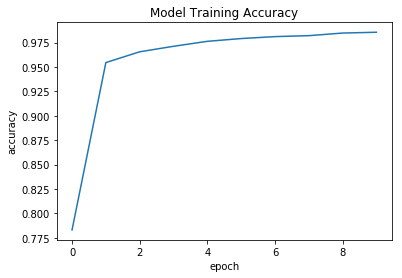

In [148]:
plt.plot(model_fitted.history["acc"])
plt.title("Model Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()